In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o dataset Iris
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
# Criar um DataFrame com as features
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# Escalar os dados (normalização)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
# Definir o número de clusters (K) - valor inicial
k = 3  # Sabemos que existem 3 classes no dataset Iris

In [6]:
# Aplicar o KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [7]:
# Adicionar os labels dos clusters ao DataFrame
df['Cluster'] = kmeans.labels_

In [8]:
# Reduzir a dimensionalidade para 2 componentes principais (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

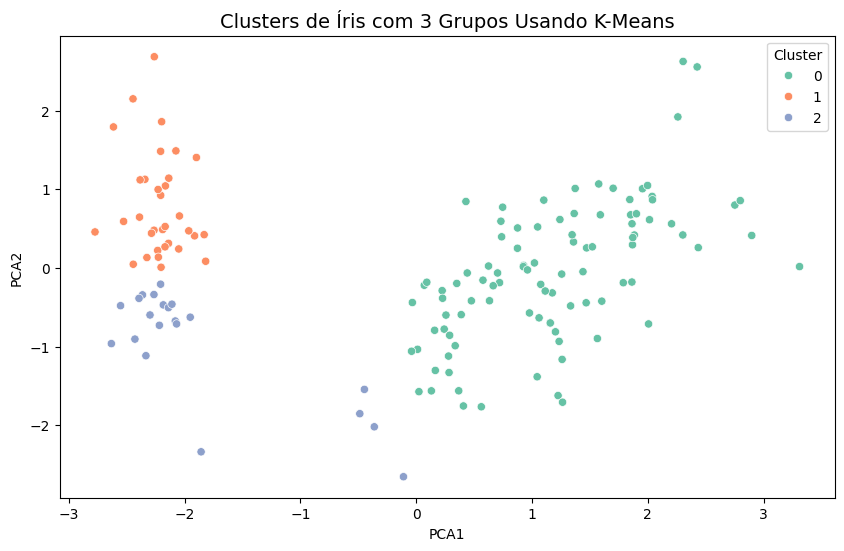

In [9]:
# Visualização dos clusters em 2D com base no PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title(f'Clusters de Íris com {k} Grupos Usando K-Means', fontsize=14)
plt.show()

In [10]:
# Verificar o número de amostras em cada cluster
print(df['Cluster'].value_counts())

Cluster
0    96
1    33
2    21
Name: count, dtype: int64


In [11]:
# Tentativa com valores de K diferentes e usando a métrica do método Elbow
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

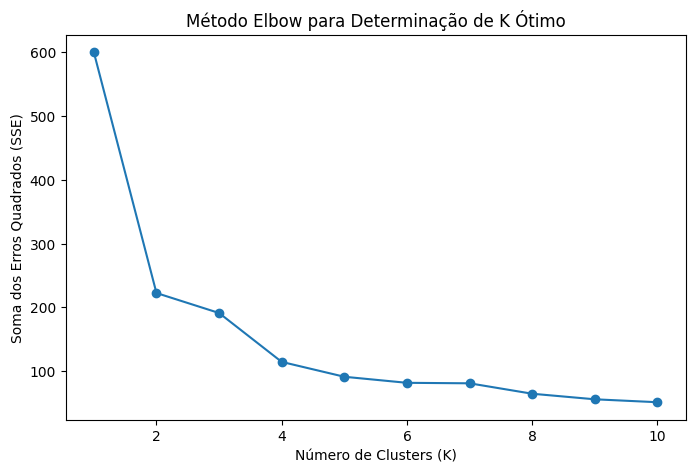

In [12]:
# Visualização do método Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Método Elbow para Determinação de K Ótimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.show()